# Linear Algebra

**Importing Libraries**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Vectors

In [2]:
# Two-dimensonal vector
my_2dvector = np.array([7, 9])
print('2D vector:', my_2dvector)

# Three-dimensonal vector
my_3dvector = np.array([4, 7, 2])
print('3D vector:', my_3dvector)

2D vector: [7 9]
3D vector: [4 7 2]


**Plotting 2D vector**

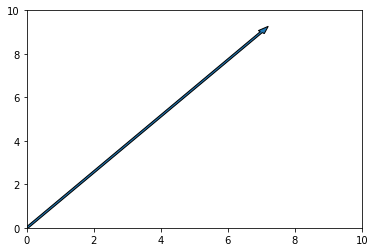

In [7]:
fig, ax = plt.subplots(1,1)
ax.arrow(0, 0, 7, 9, width=.075)
ax.set_xlim([0, 10]); ax.set_ylim([0, 10])

plt.show()

**Plotting 3D vector**

(0, 10)

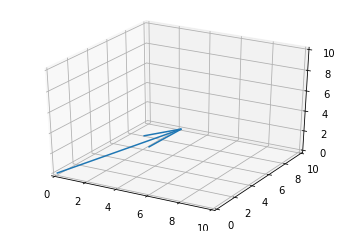

In [9]:
# 3D vector
c = [4,7,2]
vector = np.array([[0, 0, 0, c[0], c[1], c[2]]])
# Create variables for plotting
X, Y, Z, U, V, W = zip(*vector)
# Plot!
ax = plt.axes(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 10]); ax.set_ylim([0, 10]); ax.set_zlim([0, 10])

**Row and Column vectors**

In [12]:
# Row vector
my_row_vector = np.array([8,6,7,5,3,0,9])
print('Row vector:', my_row_vector)

# Column vector
# reshape(-1,1): specifies one column, unknown rows 
my_column_vector = np.array([8,6,7,5,3,0,9]).reshape(-1,1)
print('Column vector:\n', my_column_vector)

Row vector: [8 6 7 5 3 0 9]
Column vector:
 [[8]
 [6]
 [7]
 [5]
 [3]
 [0]
 [9]]


### Vector Math

**Vector length**
- The magnitude of a vectors is just it’s length

In [13]:
# Vector length
b = np.array([4, 7, 2])
np.linalg.norm(b)

8.306623862918075

**Vector Dot Product**
- The dot product is a kind of multiplication where we’re applying one vector to another. It can also be thought of as applying the directional growth of one vector to another.

In [14]:
# Dot product of two arrays (vectors)
b = np.array([4, 7, 2])
c = np.array([6, 1, 7])
np.dot(b, c)

45

**Cosine similarity**
- method for comparing vector simularity
- The angle between vectors is a measure of their similarity

[]

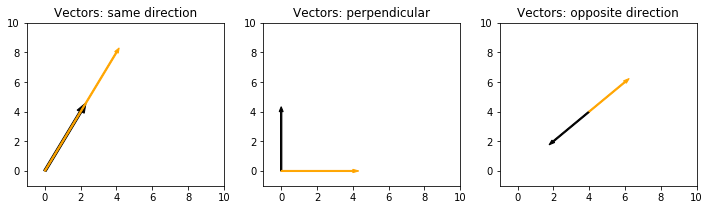

In [15]:
# Plot identical and opposite vectors

fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(12,3))

# vector1 = [2, 4]; vector2 = [4, 8]
# Same direction, y is twice as long
ax1.arrow(0, 0, 2, 4, color='k', width=.15)
ax1.arrow(0, 0, 4, 8, color='orange', width=.075)
ax1.set_xlim([-1, 10]); ax1.set_ylim([-1, 10])
ax1.set_title("Vectors: same direction")

# vector1 = [0, 4]; vector2 = [4, 0]
# Right angle vectors
ax2.arrow(0, 0, 0, 4, color='k', width=.075)
ax2.arrow(0, 0, 4, 0, color='orange', width=.075)
ax2.set_xlim([-1, 10]); ax2.set_ylim([-1, 10])
ax2.set_title("Vectors: perpendicular")

# vector1 = [-2, -2]; vector2 = [2, 2]
# Same length, opposite direction
ax3.arrow(4, 4, -2, -2, color='k', width=.075)
ax3.arrow(4, 4, 2, 2, color='orange', width=.075)
ax3.set_xlim([-1, 10]); ax3.set_ylim([-1, 10])
ax3.set_title("Vectors: opposite direction")

plt.plot()

**For the above vectors the angles are easy to calculate 0, 90, 180**

(-1, 10)

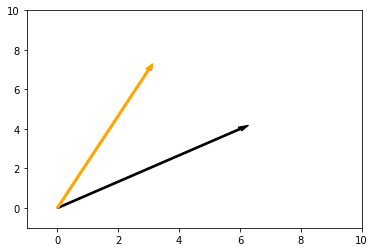

In [16]:
# Vector plots

x = np.array([6, 4])
y = np.array([3, 7])

fig, ax = plt.subplots(1,1)
ax.arrow(0, 0, x[0], x[1], color='k', width=.075)
ax.arrow(0, 0, y[0], y[1], color='orange', width=.075)
ax.set_xlim([-1, 10]); ax.set_ylim([-1, 10])

#plt.show()

**Calculating the cosine (cosine similarity)**
- will be between -1 and 1 
- 1 at 0 degrees (similar)
- -1 at 180 degrees (not similar)

In [17]:
# Calculate cosine theta

# Vectors
x = np.array([6, 4])
y = np.array([3, 7])

# Cosine theta (cosine similarity)
np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

0.8376105968386142

### Matrices

In [18]:
# Two dimensional numpy array (2x3)
matrix1 = np.array([[ 1, 2, 3],[ 4, 5, 6]])
print('2x3 matrix:\n', matrix1)

# 3x3 numpy array
matrix2 = np.array([[ 1, 2, 3],[ 4, 5, 6], [7, 8, 9]])
print('\n3x3 matrix:\n', matrix2)

2x3 matrix:
 [[1 2 3]
 [4 5 6]]

3x3 matrix:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


**Matrix multiplication**

In [19]:
# Check matrix multiplication with Python

X = np.array([[1,4,8],[2,3,1]])
Y = np.array([[1,6],[2,3],[5,7]])

X_Y = np.matmul(X, Y)
print('X * Y:\n', X_Y)

X * Y:
 [[49 74]
 [13 28]]


**Matrix Transpose**

In [20]:
A = np.array([[1, 2], [3, 4],[5, 6]])
print('Original matrix:\n', A)

A_T = np.transpose(A)
print('Transposed matrix:\n', A_T)

Original matrix:
 [[1 2]
 [3 4]
 [5 6]]
Transposed matrix:
 [[1 3 5]
 [2 4 6]]


**Identity Matrix**

The identity matrix is a specific diagonal matrix where there are only ones on the main diagonal and zeros everywhere else.
 This matrix acts a lot like the number 1: if we multiply any matrix by its identity matrix, the original matrix will remain unchanged.

### Solve for the linear regression coefficient

In [24]:
# Load the car crash dataset
df = sns.load_dataset("car_crashes")

df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [26]:
# Create the ones column
ones = np.repeat(1,len(df)).reshape(-1,1)

# Select a column and reshape to add an additional column
alcohol = np.array(df['alcohol']).reshape(-1,1)

# "Glue" the columns together
X = np.concatenate((ones, alcohol), axis=1)

# Look at the shape
print('The feature matrix has a shape:', X.shape)

# Create the dependent (target) vector
Y = np.array(df['total']).reshape(-1,1)

print('The target vector has a shape:', Y.shape)

The feature matrix has a shape: (51, 2)
The target vector has a shape: (51, 1)


**By hand**

In [27]:
# Calculate X transpose
X_T = np.transpose(X)

# Calculate X transpose multiplied by X
X_T_X = np.matmul(X_T,X)

print('X transpose multiplied by X:\n', X_T_X)

# Calculate the inverse of X_T_X
X_T_X_inv = np.linalg.inv(X_T_X)

print('\nInverse of X transpose multipled by X):\n', X_T_X_inv)

#Calculate X transpose Y
X_T_Y = np.matmul(X_T,Y)

print('\nX transpose multipled by Y:\n', X_T_Y)

# Finally - calculate B =  = (X'X)^-1 multiplied by X'Y

B = np.matmul(X_T_X_inv,X_T_Y)

print('\nThe regression coefficients B are:\n', B)

X transpose multiplied by X:
 [[  51.        249.226   ]
 [ 249.226    1367.408738]]

Inverse of X transpose multipled by X):
 [[ 0.17935002 -0.03268861]
 [-0.03268861  0.00668919]]

X transpose multipled by Y:
 [[ 805.3  ]
 [4239.177]]

The regression coefficients B are:
 [[5.85777615]
 [2.0325063 ]]


**sklearn**

In [29]:
# Instantiate the class (with default parameters)
model = LinearRegression()

# Change the format slightly of X (we just need one column, no ones)
X = np.array(df['alcohol']).reshape(-1,1)

# Fit the model
model.fit(X, Y)

# Intercept (b_0)
print('The intercept(b_0): ', model.intercept_)

# Slope (b_1)
print('The slope (b_1):', model.coef_)

The intercept(b_0):  [5.85777615]
The slope (b_1): [[2.0325063]]
